<a href="https://colab.research.google.com/github/Gugo-le/school_record_/blob/main/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# 노트북이 코랩에서 실행 중인지 체크합니다.
import sys
if 'google.colab' in sys.modules:
    !wget -q https://github.com/rickiepark/aiml4coders/raw/main/ch05/sarcasm.json
    !mkdir ../ch05
    !mv sarcasm.json ../ch05

# RNN으로 텍스트 분류기 만들기


In [3]:
import json
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from bs4 import BeautifulSoup
import string
import tensorflow as tf

In [4]:
stopwords = ["a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at",
             "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do",
             "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having",
             "he", "hed", "hes", "her", "here", "heres", "hers", "herself", "him", "himself", "his", "how",
             "hows", "i", "id", "ill", "im", "ive", "if", "in", "into", "is", "it", "its", "itself",
             "lets", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought",
             "our", "ours", "ourselves", "out", "over", "own", "same", "she", "shed", "shell", "shes", "should",
             "so", "some", "such", "than", "that", "thats", "the", "their", "theirs", "them", "themselves", "then",
             "there", "theres", "these", "they", "theyd", "theyll", "theyre", "theyve", "this", "those", "through",
             "to", "too", "under", "until", "up", "very", "was", "we", "wed", "well", "were", "weve", "were",
             "what", "whats", "when", "whens", "where", "wheres", "which", "while", "who", "whos", "whom", "why",
             "whys", "with", "would", "you", "youd", "youll", "youre", "youve", "your", "yours", "yourself",
             "yourselves"]

table = str.maketrans('', '', string.punctuation)

In [5]:
with open("../ch05/sarcasm.json", 'r') as f:
    datastore = json.load(f)

sentences = []
labels = []
urls = []
for item in datastore:
    sentence = item['headline'].lower()
    sentence = sentence.replace(",", " , ")
    sentence = sentence.replace(".", " . ")
    sentence = sentence.replace("-", " - ")
    sentence = sentence.replace("/", " / ")
    soup = BeautifulSoup(sentence)
    sentence = soup.get_text()
    words = sentence.split()
    filtered_sentence = ""
    for word in words:
        word = word.translate(table)
        if word not in stopwords:
            filtered_sentence = filtered_sentence + word + " "
    sentences.append(filtered_sentence)
    labels.append(item['is_sarcastic'])
    urls.append(item['article_link'])

<ipython-input-5-26e5c469036e>:13: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(sentence)


In [6]:
vocab_size = 20000
embedding_dim = 64
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 23000

In [7]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [8]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                                padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

In [9]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [10]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [11]:
adam = tf.keras.optimizers.Adam(learning_rate=0.0001, beta_1 = 0.9, beta_2 = 0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [13]:
num_epochs = 5
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels))

Epoch 1/5
719/719 ━━━━━━━━━━━━━━━━━━━━ 77s 107ms/step - accuracy: 0.7051 - loss: 0.5814 - val_accuracy: 0.7875 - val_loss: 0.4447
Epoch 2/5
719/719 ━━━━━━━━━━━━━━━━━━━━ 79s 103ms/step - accuracy: 0.8563 - loss: 0.3488 - val_accuracy: 0.8061 - val_loss: 0.4187
Epoch 3/5
719/719 ━━━━━━━━━━━━━━━━━━━━ 84s 106ms/step - accuracy: 0.9004 - loss: 0.2567 - val_accuracy: 0.8064 - val_loss: 0.4298
Epoch 4/5
719/719 ━━━━━━━━━━━━━━━━━━━━ 81s 105ms/step - accuracy: 0.9248 - loss: 0.2008 - val_accuracy: 0.8048 - val_loss: 0.4494
Epoch 5/5
719/719 ━━━━━━━━━━━━━━━━━━━━ 83s 107ms/step - accuracy: 0.9460 - loss: 0.1535 - val_accuracy: 0.7962 - val_loss: 0.4889


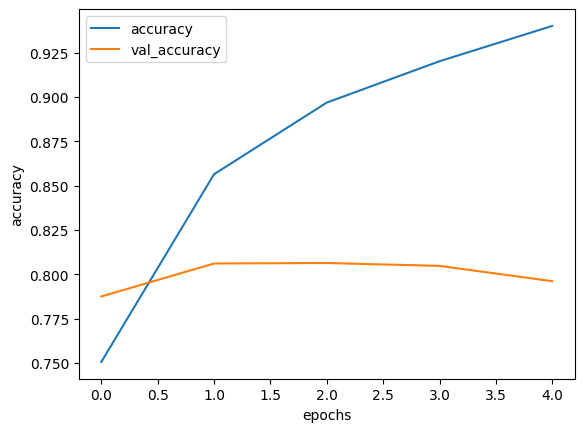

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

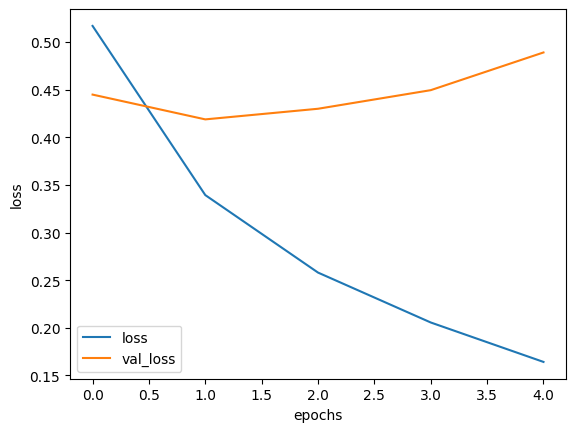

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

## 스태킹 LSTM

In [16]:
# LSTM 층을 쌓는 방법: Dense 층을 사용하는 것처럼 하나의 층을 추가하면 된다.
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim, return_sequences=True)), # 마지막 층을 제외한 모든 층은 return_sequences = True라고 설정해줘야 한다.
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.00001,
                                beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',
              optimizer=adam, metrics=['accuracy'])

In [17]:
num_epochs = 10
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels))

Epoch 1/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 162s 215ms/step - accuracy: 0.5517 - loss: 0.6895 - val_accuracy: 0.5700 - val_loss: 0.6817
Epoch 2/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 207s 222ms/step - accuracy: 0.5558 - loss: 0.6841 - val_accuracy: 0.5700 - val_loss: 0.6775
Epoch 3/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 198s 216ms/step - accuracy: 0.5557 - loss: 0.6797 - val_accuracy: 0.5708 - val_loss: 0.6699
Epoch 4/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 201s 214ms/step - accuracy: 0.5870 - loss: 0.6654 - val_accuracy: 0.6517 - val_loss: 0.6435
Epoch 5/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 201s 213ms/step - accuracy: 0.6669 - loss: 0.6250 - val_accuracy: 0.7094 - val_loss: 0.5759
Epoch 6/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 207s 220ms/step - accuracy: 0.7667 - loss: 0.5081 - val_accuracy: 0.7657 - val_loss: 0.4928
Epoch 7/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 154s 214ms/step - accuracy: 0.8174 - loss: 0.4212 - val_accuracy: 0.7760 - val_loss: 0.4749
Epoch 8/10
719/719 ━━━━━━━━━━━━━━━━━━━━ 203s 214ms/step - accuracy: 0.8373 -

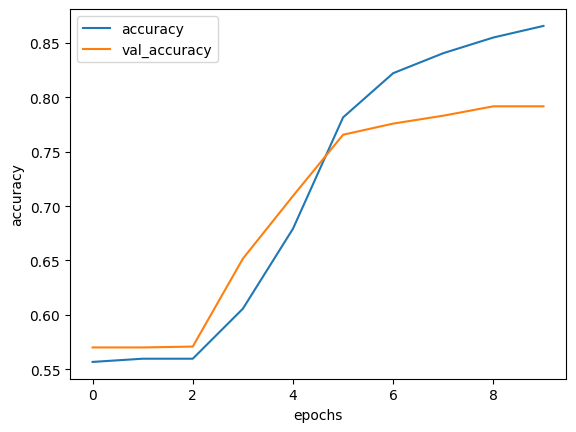

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

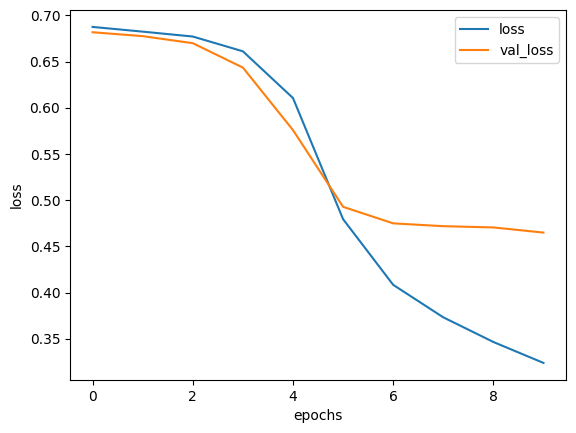

In [19]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

검증 손실이 빠르게 높아지는 것을 봤을 때 과대적합을 나타내는 명백한 신호입니다.

## 스태킹 LSTM 최적화하기

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
                                                       return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.000008,
                                beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',
              optimizer=adam,metrics=['accuracy'])

In [22]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels))

Epoch 1/30
216/719 ━━━━━━━━━━━━━━━━━━━━ 1:41 202ms/step - accuracy: 0.6419 - loss: 0.6525

KeyboardInterrupt: 

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

### 드롭아웃 사용하기

In [23]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(
        embedding_dim, return_sequences=True, dropout=0.2)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
                                                       dropout=0.2)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

adam = tf.keras.optimizers.Adam(learning_rate=0.000008,
                                beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',
              optimizer=adam,metrics=['accuracy'])


num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels))

Epoch 1/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 228s 307ms/step - accuracy: 0.5624 - loss: 0.6905 - val_accuracy: 0.5700 - val_loss: 0.6836
Epoch 2/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 160s 223ms/step - accuracy: 0.5599 - loss: 0.6851 - val_accuracy: 0.5700 - val_loss: 0.6810
Epoch 3/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 202s 222ms/step - accuracy: 0.5640 - loss: 0.6822 - val_accuracy: 0.5700 - val_loss: 0.6795
Epoch 4/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 201s 221ms/step - accuracy: 0.5621 - loss: 0.6811 - val_accuracy: 0.5700 - val_loss: 0.6760
Epoch 5/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 202s 221ms/step - accuracy: 0.5592 - loss: 0.6783 - val_accuracy: 0.5710 - val_loss: 0.6706
Epoch 6/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 159s 222ms/step - accuracy: 0.5648 - loss: 0.6722 - val_accuracy: 0.6045 - val_loss: 0.6587
Epoch 7/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 201s 221ms/step - accuracy: 0.6255 - loss: 0.6582 - val_accuracy: 0.6603 - val_loss: 0.6359
Epoch 8/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 207s 228ms/step - accuracy: 0.6747 -

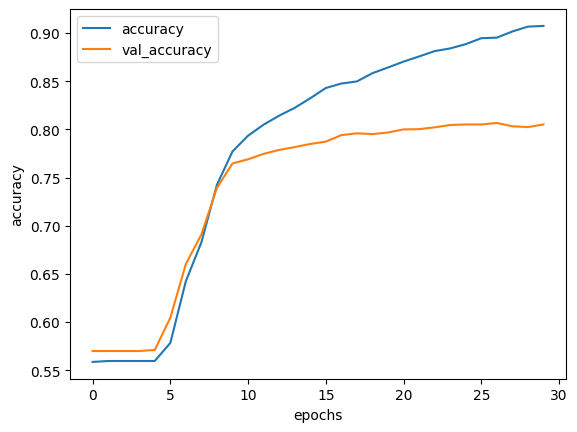

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

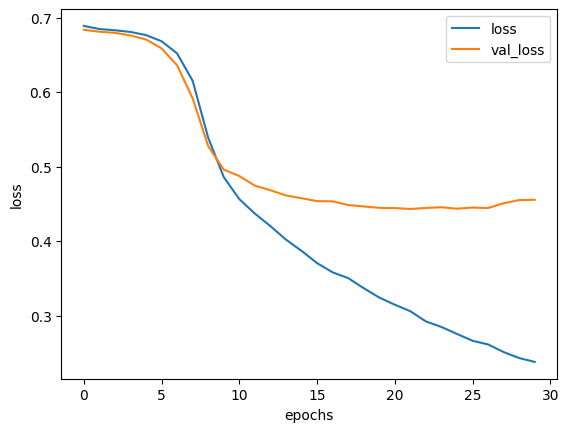

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

# RNN에 사전 훈련된 임베딩 사용하기(GloVe)

In [26]:
!wget https://bit.ly/3i9taLA -O glove.zip

--2024-08-11 11:08:00--  https://bit.ly/3i9taLA
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://tensorflowkorea.files.wordpress.com/2022/03/glove.twitter.27b.25d.txt.zip [following]
--2024-08-11 11:08:01--  https://tensorflowkorea.files.wordpress.com/2022/03/glove.twitter.27b.25d.txt.zip
Resolving tensorflowkorea.files.wordpress.com (tensorflowkorea.files.wordpress.com)... 192.0.72.19, 192.0.72.18
Connecting to tensorflowkorea.files.wordpress.com (tensorflowkorea.files.wordpress.com)|192.0.72.19|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://tensorflow.blog/wp-content/uploads/2022/03/glove.twitter.27b.25d.txt.zip [following]
--2024-08-11 11:08:01--  https://tensorflow.blog/wp-content/uploads/2022/03/glove.twitter.27b.25d.txt.zip
Resolving tensorflow.blog (tensorflow.blog)... 192.0.78.

In [27]:
# GloVe 임베딩 압축 풀기
import os
import zipfile
local_zip = 'glove.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('glove')
zip_ref.close()

In [28]:
glove_embeddings = dict()
f = open('glove/glove.twitter.27B.25d.txt')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    glove_embeddings[word] = coefs
f.close()

In [29]:
glove_embeddings['frog']

array([-1.2158  , -0.74924 ,  0.91941 ,  0.72985 , -0.12917 , -0.19555 ,
        1.2365  , -0.77196 ,  0.85161 ,  0.11922 ,  0.16816 ,  0.33334 ,
       -2.0845  , -0.53471 ,  0.013538,  0.18178 ,  1.2831  ,  0.089331,
        0.57264 ,  0.50694 ,  0.27134 ,  0.66504 ,  0.54097 , -0.58377 ,
        0.67097 ], dtype=float32)

In [30]:
vocab_size = 13200 # 어휘 사전의 크기
embedding_dim = 25 # 차원
max_length = 50
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 23000

In [31]:
training_sentences = sentences[0:training_size]
testing_sentences = sentences[training_size:]
training_labels = labels[0:training_size]
testing_labels = labels[training_size:]

In [32]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length,
                                padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length,
                               padding=padding_type, truncating=trunc_type)

In [33]:
xs=[]
ys=[]
cumulative_y=[]
total_y=0
for word, index in tokenizer.word_index.items():
    xs.append(index)
    if glove_embeddings.get(word) is not None:
        total_y = total_y + 1
        ys.append(1)
    else:
        ys.append(0)
    cumulative_y.append(total_y / index)

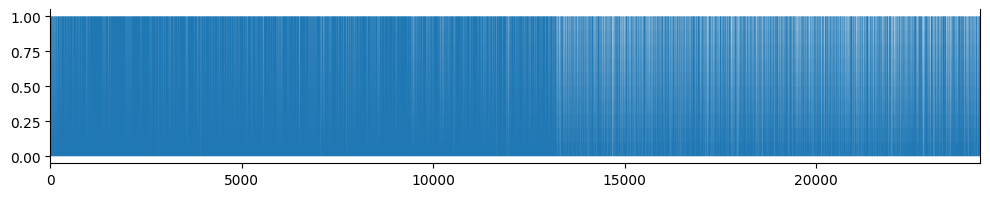

In [34]:
fig, ax = plt.subplots(figsize=(12,2))
ax.spines['top'].set_visible(False)

plt.margins(x=0, y=None, tight=True)
#plt.axis([13000, 14000, 0, 1])
plt.fill(ys)
plt.show()

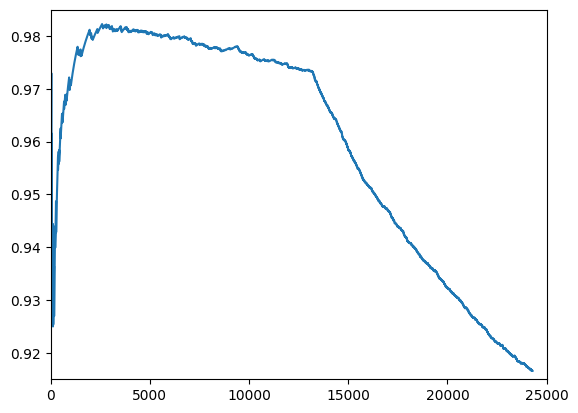

In [35]:
plt.plot(xs, cumulative_y)
plt.axis([0, 25000, .915, .985])
plt.show()

In [36]:
# 어휘 사전 크기와 임베딩 차원에 맞는 행렬을 만든다.
embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, index in tokenizer.word_index.items():
    if index > vocab_size - 1:
        break
    else:
        embedding_vector = glove_embeddings.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector

In [37]:
import numpy as np

training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [38]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim,
                              weights=[embedding_matrix], trainable=False), # 사전 훈련된 임베딩 벡터이므로 훈련 x
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim,
                                                       return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
adam = tf.keras.optimizers.Adam(learning_rate=0.00001,
                                beta_1=0.9, beta_2=0.999, amsgrad=False)
model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])

In [39]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs,
                    validation_data=(testing_padded, testing_labels))

Epoch 1/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 57s 70ms/step - accuracy: 0.5459 - loss: 0.6896 - val_accuracy: 0.5702 - val_loss: 0.6820
Epoch 2/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 79s 66ms/step - accuracy: 0.5625 - loss: 0.6805 - val_accuracy: 0.5759 - val_loss: 0.6734
Epoch 3/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 48s 66ms/step - accuracy: 0.5788 - loss: 0.6708 - val_accuracy: 0.6088 - val_loss: 0.6616
Epoch 4/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 83s 67ms/step - accuracy: 0.6188 - loss: 0.6577 - val_accuracy: 0.6538 - val_loss: 0.6477
Epoch 5/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 82s 68ms/step - accuracy: 0.6504 - loss: 0.6427 - val_accuracy: 0.6552 - val_loss: 0.6327
Epoch 6/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 47s 66ms/step - accuracy: 0.6662 - loss: 0.6250 - val_accuracy: 0.6700 - val_loss: 0.6209
Epoch 7/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 82s 66ms/step - accuracy: 0.6697 - loss: 0.6168 - val_accuracy: 0.6781 - val_loss: 0.6117
Epoch 8/30
719/719 ━━━━━━━━━━━━━━━━━━━━ 48s 66ms/step - accuracy: 0.6757 - loss: 0.6077 - 

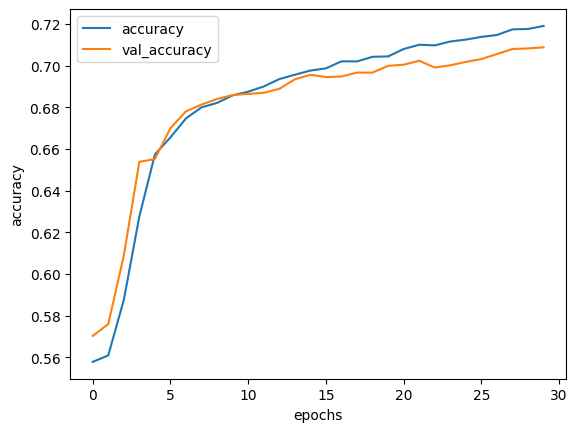

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()

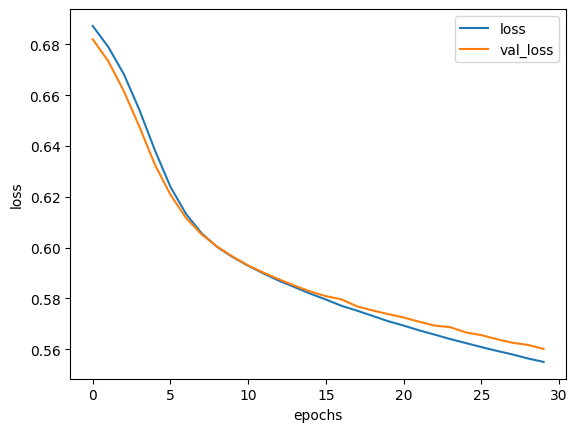

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['loss', 'val_loss'])
plt.show()

In [42]:
# 값이 0.5에 가까우면 중립 문장이며, 0에 가까우면 정상적인 문장, 1에 가까우면 빈정대는 문장입니다.

test_sentences = ["It Was, For, Uh, Medical Reasons, Says Doctor To Boris Johnson, Explaining Why They Had To Give Him Haircut",
                  "It's a beautiful sunny day",
                  "I lived in Ireland, so in High School they made me learn to speak and write in Gaelic",
                  "Census Foot Soldiers Swarm Neighborhoods, Kick Down Doors To Tally Household Sizes"]

sequences = tokenizer.texts_to_sequences(test_sentences)
padded = pad_sequences(sequences, maxlen=max_length,
                       padding=padding_type, truncating=trunc_type)
predictions = model.predict(padded)
print(predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[[0.47227556]
 [0.2557301 ]
 [0.6974381 ]
 [0.64330006]]
